# Loading and converting scripts

In [2]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns

In [90]:
def extract_dialog(script):
    '''
    Script to extract characters and dialog from script text file
    '''
    
    #print(f'script: {len(script)}')
    cast = set()
    cdialog = []
    ldialog = []
    dialogflag = False
    for line in script.split('\n'):
        #print(line)
        if line.startswith('\t\t\t\t\t'):
            #print(line)
            character = line
            cast.add(character)
            dialogflag = True
            dialog = ''
            line1 = True
        elif dialogflag:
            if line == '': 
                if dialog != '': 
                    cdialog.append(character.strip())
                    ldialog.append(dialog.strip())
                dialogflag = False
            else:
                if line1:
                    dialog += line
                    line1 = False
                else:
                    dialog += ' ' + line
    return cdialog, ldialog

In [91]:
#Using generator because can't load all scripts in range
#*issues opening episodes 219 and 226
filelist = (x for x in range(102,278) if x not in [219, 226])


In [92]:
#read scripts into array
scripts = []
for f in filelist:
    with open(f"data/scripts_tng/{f}.txt", "r") as file:
        temp = file.read()
        scripts.append((f,temp))
        
len(scripts)

174

##  Create SCRIPT dataframe

In [93]:
dfl = [] 
for ep, script in scripts:
    df = pd.DataFrame({'episode': ep,
                       'script':script}, index=[0])
    dfl.append(df)
df_script = pd.concat(dfl).reset_index()
df_script.drop(columns=['index'], inplace=True)
df_script.shape

(174, 2)

In [94]:
df_script.head()

,episode,script
0,102,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n ...
1,103,\n\n STAR TREK: THE NEXT GENERA...
2,104,\n\n\n STAR TREK: THE NEXT GENE...
3,105,\n\n\n\n\n STAR TREK: THE NEXT ...
4,106,\n\n\n\n\n\n\n STAR TREK: THE N...


In [95]:
# Add script lenght metrics
df_script['len_char'] = df_script.script.apply(len)
df_script['len_words'] = df_script.script.apply(lambda x:len(x.splitlines()))

In [96]:
#add season df_script

#list of the last episode in each season
season = [126, 148, 174, 200, 226, 252, 277]

def which_season(episode):
    '''
    Uses season list to determine which season episode is in 
    Returns -1 if not in season range
    '''
    if episode < 102: 
        return -1 
    for i, end in enumerate(season, start=1):
        if episode <= end:
            return i
    return -1 

#which_season(201)

df_script['season'] = df_script.episode.apply(which_season)

In [112]:
grp = df_script.groupby('season').agg({'len_char':np.mean}).reset_index()
grp

,season,len_char
0,1,68385.640000
1,2,66115.409091
2,3,65971.423077
3,4,66866.461538
4,5,70518.125000
5,6,72313.923077
6,7,75885.680000


Text(0, 0.5, 'Length (characters)')

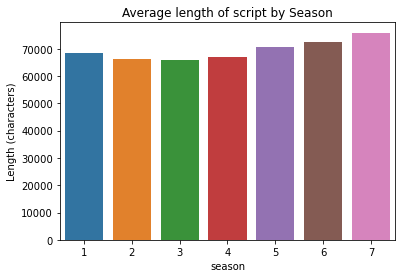

In [118]:
sns.barplot(data=grp, x='season', y='len_char')
plt.title('Average length of script by Season')
plt.ylabel('Length (characters)')

In [119]:
df_script.tail()

,episode,script,len_char,len_words,season
169,273,\n\n\n\n\n\n\n STAR TREK: THE N...,72740,3371,7
170,274,\n\n\n\n\n\n\n\n\n STAR TREK: T...,70677,3265,7
171,275,\n\n\n\n\n\n\n STAR TREK: THE N...,72442,3298,7
172,276,\n\n\n\n\n\n STAR TREK: THE NEX...,72389,3408,7
173,277,\n STAR TREK: THE NEXT GENERATI...,153910,7069,7


In [120]:
df_script.to_csv('tng_scripts.csv')

## Create DIALOG dataframe

In [121]:
dfl = [] 
for ep, script in scripts:
    cdialog, ldialog = extract_dialog(script)
    #print(cdialog)
    df = pd.DataFrame({'episode': ep,
                       'character':cdialog,
                       'dialog':ldialog})
    dfl.append(df)
df_tot = pd.concat(dfl) #.reset_index()
#df_tot.rename(columns={'index':'ep_index'}, inplace=True)
df_tot.shape

(70172, 3)

In [122]:
#add season
df_tot['season'] = df_tot.episode.apply(which_season)

In [123]:
df_tot['dialog'] = df.dialog.str.replace('\t','')

In [124]:
df_tot.head()

,episode,character,dialog,season
0,102,PICARD V.O.,That was an incredible program.,1
1,102,PICARD V.O.,I am glad you approve. I have always found the...,1
2,102,PICARD V.O.,"Worf, we were strolling barefoot along the bea...",1
3,102,PICARD V.O.,(groping) It was... very stimulating.,1
4,102,PICARD V.O.,I should take my own advice and use it to rela...,1


In [125]:
df_tot.tail()

,episode,character,dialog,season
849,277,DATA,Would you care to deal?,7
850,277,PICARD,Oh... thank you.,7
851,277,PICARD,(continuing) I should have done this a long ti...,7
852,277,TROI,You were always welcome.,7
853,277,PICARD,"So. Five card stud, nothing wild. The sky's th...",7


### Cleanup Character field

In [126]:
def print_characters(searchfor = None):
    count = 0
    chrs = df_tot.character.unique()
    for x in sorted(chrs):
        if searchfor:
            if x.find(searchfor) != -1:
                count += 1
                print(x)
        else:
            count += 1
            print(x)                
    print(count)

In [127]:
df_tot.character.nunique()

1467

In [128]:
print_characters()

"Q" (21ST CENTURY)
"Q" (ADMIRAL)
"Q" (BROTHER)
"Q" (BROTHER) (O.S.)
"Q" (COMMANDER)
"Q" (Cont'd)
"Q" (DATA)
"Q" (ELIZABETHAN)
"Q" (JUDGE)
"Q" (MARINE CAPTAIN)
"Q" (MARSHAL)
"Q" (MARSHAL) (O.S.)
"Q" (O.S.)
"Q" (STARFLEET)
"Q" (V.O.)
"Q". (MARSHAL)
AARON
ACCOLAN
AD LIBBED VOICES
ADMINISTRATOR
ADMIRAL
ADMIRAL BRACKETT
ADMIRAL GROMEK
ADMIRAL GROMEK (cont'd)
ADMIRAL HADEN
ADMIRAL HADEN (Cont'd)
ADMIRAL HAFTEL
ADMIRAL HAFTEL (Cont'd)
ADMIRAL HAYES
ADMIRAL HAYES (Cont'd)
ADMIRAL HOLT
ADMIRAL SATIE
ADMIRAL SATIE (Cont'd)
ADMIRAL SIMONS
AIDE
AJUR
ALANS
ALEXANA
ALEXANA (cont'd)
ALEXANDER
ALEXANDER (cont'd)
ALEXANDRA
ALIEN
ALIEN #1
ALIEN #2
ALIEN #4
ALIEN CAPTAIN
ALIEN CAPTAIN (O.S.)
ALIEN NURSE
ALKAR
ALL
ALL BUT PATTERSON
ALL IN GROUP
ALLENBY
ALRIK
ALYSSA
AMANDA
AMANDA (Cont'd)
AMARIE
AMARIE (cont'd)
ANDRONA
ANNA
ANNA'S VOICE
ANNE
ANNE (V.O.)
ANNETTE
ANNIE
ANNIE (O.S.)
ANTEDIAN FEMALE
ANTEDIANS
ANTHARWA
ANTHWARA
ANTHWARA (Cont'd)
ANYA
ANYA (O.S.)
ANYA'S COM VOICE
APGAR
APGAR (O.S.)
APGAR (cont'd

### Remove voice only , continued, etc. other txt making the character list long than it should be

In [129]:
df_tot['character_raw'] = df_tot.character.copy()

In [130]:
regex = re.compile(r'\(.*\)')   #filter for (V.O.), (cont'd), etc. 

def clean_characters1(c):
    return str.strip(regex.sub('', c.lower()))

df_tot['character']= df_tot['character_raw'].apply(clean_characters1)

In [131]:
regex2 = re.compile(r"'s voice")   #filter for "CHARACTER's voice"

def clean_characters2(c):
    return str.strip(regex2.sub('', c))

df_tot['character']= df_tot['character'].apply(clean_characters2)

In [132]:
regex3 = re.compile(r"'s com voice")   #filter for "CHARACTER's com voice"

def clean_characters3(c):
    return str.strip(regex3.sub('', c))

df_tot['character']= df_tot['character'].apply(clean_characters3)

In [133]:
#manual cleanup
df_tot['character'] = df_tot['character'].str.replace(')','', regex=False)
df_tot['character'] = df_tot['character'].str.replace('(v. o.','', regex=False)
df_tot['character'] = df_tot['character'].str.replace('(v.o.','', regex=False)

df_tot['character'] = df_tot['character'].str.replace('v.o.','', regex=False)

In [134]:
df_tot.head()

,episode,character,dialog,season,character_raw
0,102,picard,That was an incredible program.,1,PICARD V.O.
1,102,picard,I am glad you approve. I have always found the...,1,PICARD V.O.
2,102,picard,"Worf, we were strolling barefoot along the bea...",1,PICARD V.O.
3,102,picard,(groping) It was... very stimulating.,1,PICARD V.O.
4,102,picard,I should take my own advice and use it to rela...,1,PICARD V.O.


In [135]:
print_characters()

"q"
"q".
aaron
accolan
ad libbed voices
administrator
admiral
admiral brackett
admiral gromek
admiral haden
admiral haftel
admiral hayes
admiral holt
admiral satie
admiral simons
aide
ajur
alans
alexana
alexander
alexandra
alien
alien #1
alien #2
alien #4
alien captain
alien nurse
alkar
all
all but patterson
all in group
allenby
alrik
alyssa
amanda
amarie
androna
anna
anne
annette
annie
antedian female
antedians
antharwa
anthwara
anya
apgar
apprentice
aquiel
ard'rian
ardra
ardra/devil
ardra/fek'lhr
argyle
ariana
ariel
armus
aron
arridor
assistant
assistant engineer
assistant manager
attendant
b'etor
b'ijik
b'tardat
b.g. robinson
ba'el
badar n'd'd
ballard
bandi woman
bandito
baran
barber
barclay
barnaby
barron
bartel
bartender
bashir
bass
batai
bates
bateson
beata
bell
bellboy
ben
benbeck
bensen
benson
benzan
berel
berik
bevelry
beverly
beverly & troi
beverly's
beverly's 
beverly/fairy
bhavani
biomolecular physiologist
birta
blackwell
bochra
bok
bolian
boratus
borg
borg #1
borg #2
boy
b

In [136]:
df_tot.to_csv('tng_all_dialog3.csv')

In [1]:
plt.figure(figsize=(8.8))

(df_tot.character.value_counts()[:20]
     .sort_values(ascending=False)
     .plot.barh())

plt.title('Dialogs by Character - Entire Series')
plt.xlabel('Dialogs')

plt.annotate('Bulk of dialog is \nbetween 7 main characters', xy=(8000,4))
plt.hlines(y=6.5,xmin=0, xmax=14000, color='red', linestyle='--');

plt.savefig('dialogsbycharacter.png')

NameError: name 'plt' is not defined

In [ ]:
plt.barh()